In [16]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=60, verbose=1
    
    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/60
1123/1123 [==============================] - 139s 123ms/step - loss: 1.1564 - acc: 0.5573 - val_loss: 1.1101 - val_acc: 0.5512
Epoch 2/60
1123/1123 [==============================] - 94s 84ms/step - loss: 0.6893 - acc: 0.7417 - val_loss: 0.9447 - val_acc: 0.6563
Epoch 3/60
1123/1123 [==============================] - 97s 86ms/step - loss: 0.4981 - acc: 0.8175 - val_loss: 1.6083 - val_acc: 0.5399
Epoch 4/60
1123/1123 [==============================] - 94s 84ms/step - loss: 0.3983 - acc: 0.8579 - val_loss: 1.0385 - val_acc: 0.6790
Epoch 5/60
1123/1123 [==============================] - 93s 83ms/step - loss: 0.3230 - acc: 0.8850 - val_loss: 1.1236 - val_acc: 0.6950
Epoch 6/60
1123/1123 [==============================] - 96s 85ms/step - loss: 0.2748 - acc: 0.9067 - val_loss: 0.3659 - val_acc: 0.8582
Epoch 7/60
1123/1123 [==============================] - 94s 84ms/step - loss: 0.2334 - a

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

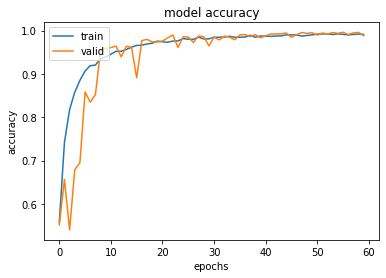

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

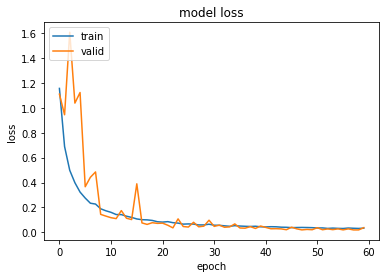

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, precision_score, recall_score

Y_preds = model.predict(x_test)

Y_preds = np.argmax(Y_preds, axis=1)
Y_true = np.argmax(y_test, axis=1)

acc = accuracy_score(np.round(Y_preds),Y_true)*100
cm = confusion_matrix(Y_true, np.round(Y_preds))
precision=precision_score(np.round(Y_preds),Y_true,average='weighted')*100
recall=recall_score(np.round(Y_preds),Y_true,average='weighted')*100
#tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\n============TEST METRICS=============')
#precision = tp/(tp+fp)*100
#recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['acc'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[495   2  12   0   0   0]
 [  2 688  13   0   0   0]
 [  0   0 610   0   0   0]
 [  0   0   0 387   0   0]
 [  0   4   0   1 289   0]
 [  1   0   0   1   0 492]]

============TEST METRICS=============
Accuracy: 98.7987987987988%
Precision: 98.81840905393742%
Recall: 98.7987987987988%
F1-score: 98.80860295337058

TRAIN METRIC ----------------------
Train acc: 99.08


In [21]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = [ 'Commom rust','Bipolaris maydis','Curvularia lunata(wakker) boed spot','Northern leaf blight','Own spot','Sheath blight']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

                                     precision    recall  f1-score   support

                        Commom rust       0.99      0.97      0.98       509
                   Bipolaris maydis       0.99      0.98      0.98       703
Curvularia lunata(wakker) boed spot       0.96      1.00      0.98       610
               Northern leaf blight       0.99      1.00      1.00       387
                           Own spot       1.00      0.98      0.99       294
                      Sheath blight       1.00      1.00      1.00       494

                           accuracy                           0.99      2997
                          macro avg       0.99      0.99      0.99      2997
                       weighted avg       0.99      0.99      0.99      2997



In [22]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
2997/2997 [==============================] - 6s 2ms/step
Test Accuracy: 98.7987987987988


In [23]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

2997/2997 [==============================] - 6s 2ms/step
0.036918287450344506
0.987987987987988


In [24]:
print(history.history['val_acc'])

[0.5512178845909941, 0.656322989676211, 0.5398732065796494, 0.6790123456989005, 0.6950283617348045, 0.8581915248581915, 0.8345011678543893, 0.851851851891628, 0.9536202869536203, 0.9586252919586253, 0.9606272939606273, 0.963963963963964, 0.9392726059392726, 0.9636302969636303, 0.9612946279612946, 0.8908908909306671, 0.9766433099766433, 0.9796463129796463, 0.9736403069736403, 0.9736403069736403, 0.9756423089756423, 0.982982982982983, 0.9896563229896563, 0.960960960960961, 0.9856523189856523, 0.984984984984985, 0.9723056389723056, 0.9873206539873206, 0.985985985985986, 0.9646312979646313, 0.9846513179846513, 0.9783116449783117, 0.986986986986987, 0.9846513179846513, 0.9786453119786453, 0.9896563229896563, 0.9906573239906573, 0.985985985985986, 0.9903236569903237, 0.9833166499833167, 0.9876543209876543, 0.991991991991992, 0.991991991991992, 0.9923256589923256, 0.9943276609943277, 0.9843176509843177, 0.9903236569903237, 0.9953286619953287, 0.9933266599933267, 0.994994994994995, 0.989322655

In [25]:
print(history.history['val_loss'])

[1.11011105053895, 0.9446947095113315, 1.6082600854339701, 1.0384887397975415, 1.1235853706970984, 0.36593471747420014, 0.4418794087093593, 0.4848127078847922, 0.14370961015137249, 0.12981737857795742, 0.11696951848746569, 0.1095674225036894, 0.17395087202944415, 0.11264382217552986, 0.10194425667180224, 0.38937897278318506, 0.07500316222155734, 0.06298830634008498, 0.07676206260130572, 0.07140781262266137, 0.07314575010201184, 0.05648791084217836, 0.03525619667872471, 0.10744703070173263, 0.045988794904690725, 0.041836438953586255, 0.08009753748323939, 0.04388592046324113, 0.049053787716622735, 0.0966688070598055, 0.047243185427708285, 0.057264919054433754, 0.04006002797425638, 0.043047285610092474, 0.06697781995849508, 0.03417762321663798, 0.03262987910336148, 0.045317456096264384, 0.030594551916049532, 0.04995751799032817, 0.0388320809196453, 0.027929018147224184, 0.02867301545579149, 0.026902600533641956, 0.02032707454926663, 0.040451962346872046, 0.027474516867981226, 0.0189295487

In [26]:
print(history.history['acc'])

[0.5572255622355823, 0.7418169672745051, 0.8174126029837453, 0.8578267646403919, 0.8849922066354932, 0.9067022934758405, 0.9188376753507014, 0.9201736806947228, 0.9354264083723002, 0.9385437541750167, 0.9455577822178569, 0.9520151413806269, 0.9522378089379638, 0.9563571587619684, 0.9613671787887765, 0.9655978623781776, 0.9661545312847918, 0.9690492095301715, 0.9706078824315297, 0.9755065686929414, 0.9739478957915831, 0.9729458917702951, 0.9756179024716098, 0.9759519038076152, 0.9812959251837008, 0.9798485860610109, 0.979625918503674, 0.9846359385437542, 0.9805165887330216, 0.9807392562903585, 0.9844132709864173, 0.9844132709864173, 0.9849699398797596, 0.9866399465597863, 0.9844132709731452, 0.9844132709864173, 0.9849699398797596, 0.9888666221331552, 0.9843019371944768, 0.9874192830104653, 0.9869739478957916, 0.9864172790024494, 0.9873079492185249, 0.9876419505678022, 0.9898686261411712, 0.9899821905609973, 0.9896436525612472, 0.9871966154531285, 0.9884212870184814, 0.9899799599198397, 

In [27]:
print(history.history['loss'])

[1.1565556233336947, 0.6890579613020626, 0.49814868165440135, 0.39831139139650235, 0.3230018172992932, 0.27487297738279937, 0.23339468586971754, 0.22670763804289246, 0.18858218250455688, 0.1726292244711755, 0.160105344545958, 0.1423471978262309, 0.1418800357393456, 0.12904963738964573, 0.11930137471466148, 0.10685954019363013, 0.10091480605040459, 0.09957641424319641, 0.09492424763271477, 0.08439862524056395, 0.08155385866390835, 0.08528503356449617, 0.07697782904335632, 0.0733205518364679, 0.06521831370860694, 0.0670097978898187, 0.06551648599816894, 0.05883020465054859, 0.058857990042853955, 0.06458781962988032, 0.056425333635398776, 0.05567751539579942, 0.051629568426486167, 0.04780055695086671, 0.052926888418566596, 0.04989640555965922, 0.047807989052300465, 0.04640252900227844, 0.04831530668524321, 0.04386254574745436, 0.04264545374373345, 0.04459317070010517, 0.043869193401454135, 0.04073503967083201, 0.03988554238119235, 0.03700696582108016, 0.037987868345816016, 0.0386117596118

In [28]:
pred = model.predict(x_test,verbose=1)
y_pred = np.argmax(pred, axis = 1)
y_pred

2997/2997 [==============================] - 6s 2ms/step


array([0, 5, 1, ..., 0, 0, 1], dtype=int64)

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[495   2  12   0   0   0]
 [  2 688  13   0   0   0]
 [  0   0 610   0   0   0]
 [  0   0   0 387   0   0]
 [  0   4   0   1 289   0]
 [  1   0   0   1   0 492]]


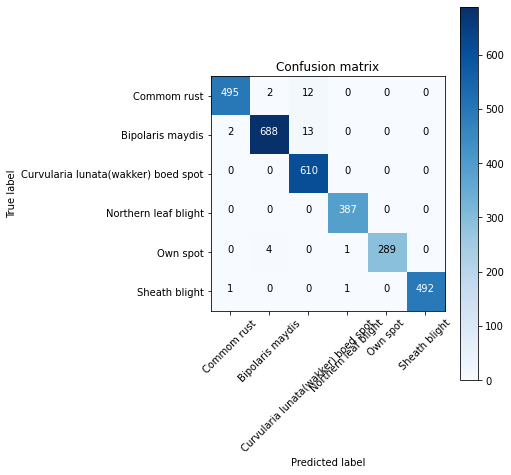

In [30]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

In [31]:
import tensorflow as tf
import tensorflow.keras.backend as K

def get_flops(model):
    run_meta = tf.RunMetadata()
    opts = tf.profiler.ProfileOptionBuilder.float_operation()

    flops = tf.profiler.profile(graph=K.get_session().graph,
                                run_meta=run_meta, cmd='op', options=opts)
 
    return flops.total_float_ops

if __name__ == "__main__":
    x = K.random_normal(shape=(1, 1, 100, 256))
    model = ShuffleNet_V2(x.shape)
    print('FLOPs of tensorflow 1.12.0:', get_flops(model))


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
FLOPs of tensorflow 1.12.0: 7112548
